#Intelligent Systems - Assignment 4 - Machine Learning

- Member Names: Ahmet Süha Atici, Leonid Oliinyk.
- Assignment: TODO
  * design and implement a solution for the "Missionaries and Cannibals" puzzle, ensuring that cannibals never outnumber missionaries on either side of the river (when missionaries are present there).
  * Implement and compare local search algorithms (SHC, RRHC, SRRHC, BS) to optimize antenna placement.
- Time spent in the assignment: TODO (10-15?) hours total.
- Proportion of effort done by members of the group: each member contributed 50% of effort.
- Doubts and difficulties that arose during the realization: TODO
  * understanding the intricacies of the search algorithms, becoming familiar with the R programming language, and effectively debugging the code.
  * correctly implementing the logic for each local search variant (especially Beam Search successor selection and the random state generation for restart methods), debugging issues, interpreting the performance differences between the algorithms.
- Use of AI: AI was used to clarify the assignment's problem description, understand given R code, and help with commenting the
implemented functions.

---

**General instructions**
 1. If you use a function of a certain library, do not forget to include the corresponding command to install or load the library
 2. Do not forget to comment on the code, especially those non-trivial commands (part of the rating depends on the cleaning of the code)
 3. It is strongly recommended to test any implemented function in order to    check for its proper operation

---

 **Submission**
- Print the notebook in a PDF file with all the sections expanded and all the cells executed, in a way all the code can be seen, and all the results are shown.
- Save the notebook as ipynb file.
- Submit both files into ALUD (not in a zip file)

---

**Evaluation**
- Total Evaluation - 20%.
  - Correct and error-free execution
  - Efficiency and cleanness of the code
  - Documentation of the code and analysis of results

In [ ]:
# PLEASE, INCLUDE HERE IF YOU USE ANY ADDITIONAL LIBRARY
packages = c("glue","ggplot2","gridExtra","tidyverse","caret","rpart","e1071")
newpack  = packages[!(packages %in% installed.packages()[,"Package"])]
if(length(newpack)) install.packages(newpack)
a=lapply(packages, library, character.only=TRUE)
rm(list = ls())

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attachi

In [ ]:
set.seed(0)

In [ ]:
# TODO
# CHANGE tables to `knitr::kable`

## 🚨 Linear Regression (Your solution here)




### Reading Data

In [ ]:
# Read the advertising data
lr_data_orig = read.csv("Advertising.csv")
lr_data = select(lr_data_orig, -X)
head(lr_data)

,TV,Radio,Newspaper,Sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


In [ ]:
# Data structure
str(lr_data)

'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ Radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ Newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ Sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


In [ ]:
# Data summary
summary(lr_data)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:10.38  
 Median :149.75   Median :22.900   Median : 25.75   Median :12.90  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :14.02  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:17.40  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

### Data Imputation

In [ ]:
# Count NA values
sum(is.na(lr_data))

[1] 0

### Model Training

In [ ]:
# Define a function to perform one iteration of training and evaluation
train_and_evaluate = function(data_input, iteration_number = 0, perc = 0.75) {
  # Randomly divide data into train (75%) and test (25%) subsets
  data_length = 1:nrow(lr_data)
  sample_indices = createDataPartition(y = data_length, p = perc, list = FALSE)
  train_data = data_input[sample_indices, ]
  test_data = data_input[-sample_indices, ]

  # Train Linear Regression with train data to predict "Sales"
  current_model = lm(Sales ~ ., data = train_data)

  # Make predictions over the test data
  predictions = predict(current_model, newdata = test_data)

  # Calculate Metrics
  actuals = test_data$Sales
  mae = mean(abs(actuals - predictions))
  mse = mean((actuals - predictions)^2)
  mape = mean(abs((actuals - predictions) / actuals))

  # Return a list containing the metrics and the trained model
  return(list(
    metrics = data.frame(
      iteration = iteration_number,
      mae = mae,
      mse = mse,
      mape = mape
    ),
    model = current_model
  ))
}

In [ ]:
# Initialize variables
lr_models_list = list()
lr_metrics_list = list()
train_percentage = 0.75

In [ ]:
# Train and evaluate the model 10 times
for (i in 1:10) {
  iteration_result = train_and_evaluate(lr_data, iteration_number = i, perc = train_percentage)
  lr_models_list[[i]] = iteration_result$model
  lr_metrics_list[[i]] = iteration_result$metrics
}

### Plot Coefficients

#### Code

In [ ]:
# Extract coefficients from the last model
last_lr_model = lr_models_list[[10]]
model_coefficients = coef(last_lr_model)
model_coefficients

(Intercept)           TV        Radio    Newspaper 
 2.862168410  0.047075033  0.185311968 -0.002639217

In [ ]:
# Convert the vector of coefficients to a data frame
coefficients_df_last_model = data.frame(
  coefficient_name = factor(names(model_coefficients)),
  value = model_coefficients,
  row.names = NULL
)

coefficients_df_last_model

coefficient_name,value
<fct>,<dbl>
(Intercept),2.862168410
TV,0.047075033
Radio,0.185311968
Newspaper,-0.002639217


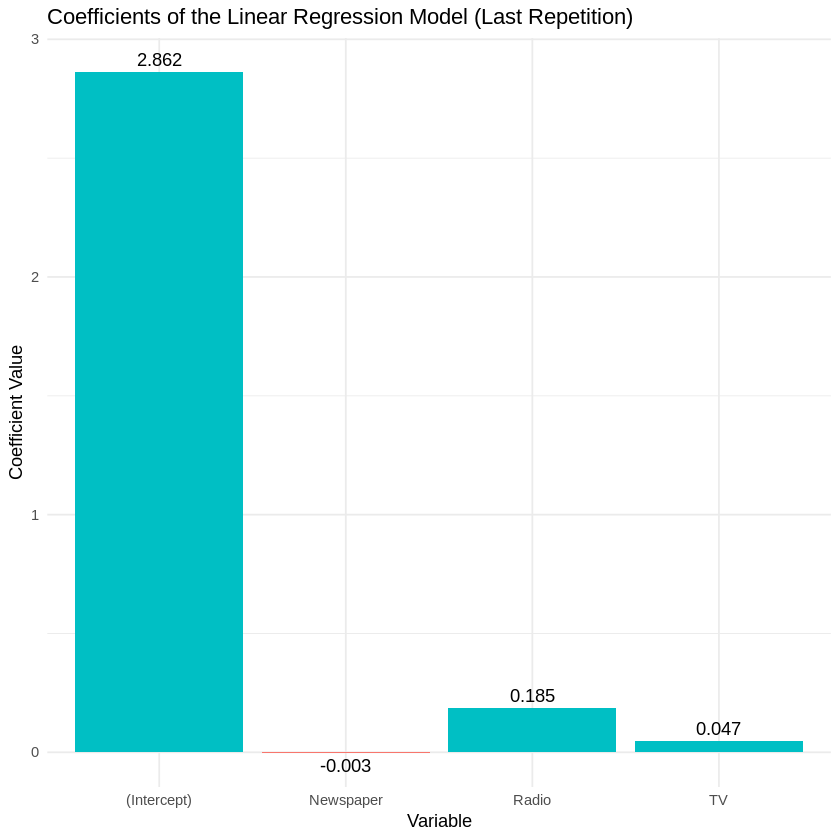

In [ ]:
# Make a bar chart with model's coefficients
coefficients_df_last_model %>%
  ggplot(aes(x = coefficient_name, y = value, fill = value > 0)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  geom_text(aes(label = round(value, 3)),
            vjust = ifelse(coefficients_df_last_model$value >= 0, -0.5, 1.5)) +
  labs(title = "Coefficients of the Linear Regression Model (Last Repetition)",
       x = "Variable", y = "Coefficient Value") +
  theme_minimal()

#### Conclusions

This last model shows that `TV` and `Radio` variables have a positive effect on `Sales`, with Radio having a larger impact. However, `Newspaper` variables does not appear to be important and is extremely close to zero, making it insignificant.

### Print Execution Results

#### Code

In [ ]:
# Combine metrics list into a single dataframe
all_lr_results = bind_rows(lr_metrics_list)
all_lr_results

iteration,mae,mse,mape
<int>,<dbl>,<dbl>,<dbl>
1,1.147702,2.142378,0.08927249
2,1.146801,1.940040,0.10298462
3,1.547822,4.889717,0.26052430
4,1.190439,2.103767,0.13533841
5,1.248278,2.362213,0.11214419
6,1.398483,4.259606,0.23869211
7,1.202358,2.269568,0.10381744
8,1.097042,1.811584,0.09727396
9,1.307335,4.072351,0.22676141


In [ ]:
summary_metrics = all_lr_results %>%
    summarise(
      Mean_MAE = mean(mae),
      StDev_MAE = sd(mae),
      Mean_MSE = mean(mse),
      StDev_MSE = sd(mse),
      Mean_MAPE = mean(mape),
      StDev_MAPE = sd(mape)
    ) %>%
    round(3)

t(summary_metrics)

Mean_MAE,1.248
StDev_MAE,0.136
Mean_MSE,2.816
StDev_MSE,1.129
Mean_MAPE,0.147
StDev_MAPE,0.067


#### Conclusions

The MAE indicates that on average the model's sales predictions were off by approximately \$1248. The MSE of 2.82 shows the average squared difference between predicted and actual sales. The MAPE suggests that the model's predictions typically were incorrect by about 14.73% from the actual sales values. Overall, the model appear to be fairly reliable.

### Identify 10 Most Profitable Campaigns

#### Code

In [ ]:
# Calculate predictions for all rows
all_predictions = predict(last_lr_model, newdata = lr_data)

In [ ]:
# Add a column to the original dataset
lr_data_all = lr_data_orig %>% mutate(sales_predicted = all_predictions)

head(lr_data_all)

,X,TV,Radio,Newspaper,Sales,sales_predicted
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1,20.51629
2,2,44.5,39.3,45.1,10.4,12.12074
3,3,17.2,45.9,69.3,9.3,11.99478
4,4,151.5,41.3,58.5,18.5,17.49303
5,5,180.8,10.8,58.4,12.9,13.22057
6,6,8.7,48.9,75.0,7.2,12.13554


In [ ]:
# Calculate total investment for each campaign
lr_data_profitable = lr_data_all %>%
  mutate(
    total_investment = TV + Radio + Newspaper,
    ratio_real = Sales / total_investment,
    ratio_pred = sales_predicted / total_investment
  )
head(lr_data_profitable)

,X,TV,Radio,Newspaper,Sales,sales_predicted,total_investment,ratio_real,ratio_pred
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1,20.51629,337.1,0.06555918,0.06086115
2,2,44.5,39.3,45.1,10.4,12.12074,128.9,0.08068270,0.09403211
3,3,17.2,45.9,69.3,9.3,11.99478,132.4,0.07024169,0.09059502
4,4,151.5,41.3,58.5,18.5,17.49303,251.3,0.07361719,0.06961013
5,5,180.8,10.8,58.4,12.9,13.22057,250.0,0.05160000,0.05288229
6,6,8.7,48.9,75.0,7.2,12.13554,132.6,0.05429864,0.09151987


In [ ]:
# Get the top 10 most profitable campaigns based on the given sales
top_profitable_real = lr_data_profitable %>%
  arrange(desc(ratio_real)) %>%
  mutate(Profitability_Ratio = round(ratio_real, 3)) %>%
  select(X, TV, Radio, Newspaper, Sales, Profitability_Ratio) %>%
  slice_head(n = 10)

top_profitable_real

X,TV,Radio,Newspaper,Sales,Profitability_Ratio
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,8.6,2.1,1.0,4.8,0.410
67,31.5,24.6,2.2,9.5,0.163
133,8.4,27.2,2.1,5.7,0.151
156,4.1,11.6,5.7,3.2,0.150
77,27.5,1.6,20.7,6.9,0.139
196,38.2,3.7,13.8,7.6,0.136
109,13.1,0.4,25.6,5.3,0.136
173,19.6,20.1,17.0,7.6,0.134
137,25.6,39.0,9.3,9.5,0.129


In [ ]:
# Get the top 10 most profitable campaigns based on the predicted sales
top_profitable_pred = lr_data_profitable %>%
  arrange(desc(ratio_pred)) %>%
  mutate(Profitability_Ratio = round(ratio_pred, 3)) %>%
  select(X, TV, Radio, Newspaper, Sales, Profitability_Ratio) %>%
  head(10)

top_profitable_pred

,X,TV,Radio,Newspaper,Sales,Profitability_Ratio
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,8.6,2.1,1.0,4.8,0.312
2,156,4.1,11.6,5.7,3.2,0.243
3,133,8.4,27.2,2.1,5.7,0.220
4,131,0.7,39.6,8.7,1.6,0.208
5,79,5.4,29.9,9.4,5.3,0.193
6,67,31.5,24.6,2.2,9.5,0.153
7,137,25.6,39.0,9.3,9.5,0.153
8,191,39.5,41.1,5.8,10.8,0.143
9,167,17.9,37.6,21.6,8.0,0.138


In [ ]:
# Get the row numbers identical for both cases
intersect(top_profitable_real$X, top_profitable_pred$X)

[1]   9  67 133 156 137 191

#### Conclusions

From the real data, campaign 9 notably achieved a very high profitability ratio of 0.41. The model-predicted top 10 profitable campaigns also show different investment strategies, although they differ from the actualy original data ones. For these campaigns, the result ratios range from 0.134 to 0.312, while the real data ones have a range of 0.125 to 0.163 (not including the campaign 9). Six campaigns (including 9, 67, 133, 137, 156, and 191) appear in both the actual and model-predicted top 10 lists.

### Identify 10 Most Surprising Campaigns

#### Code

In [ ]:
# Calculate the difference between actual and predicted sales
lr_data_surprise = lr_data_all %>%
  mutate(prediction_difference = Sales - sales_predicted) %>%
  round(3)
head(lr_data_surprise)

,X,TV,Radio,Newspaper,Sales,sales_predicted,prediction_difference
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1,20.516,1.584
2,2,44.5,39.3,45.1,10.4,12.121,-1.721
3,3,17.2,45.9,69.3,9.3,11.995,-2.695
4,4,151.5,41.3,58.5,18.5,17.493,1.007
5,5,180.8,10.8,58.4,12.9,13.221,-0.321
6,6,8.7,48.9,75.0,7.2,12.136,-4.936


In [ ]:
# Get the top 5 campaigns with the highest positive difference
top_positive_surprise = lr_data_surprise %>%
  filter(prediction_difference > 0) %>%
  arrange(desc(prediction_difference)) %>%
  head(n = 5)

top_positive_surprise

,X,TV,Radio,Newspaper,Sales,sales_predicted,prediction_difference
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,92,28.6,1.5,33.0,7.3,4.399,2.901
2,118,76.4,0.8,14.8,9.4,6.568,2.832
3,77,27.5,1.6,20.7,6.9,4.399,2.501
4,56,198.9,49.4,60.0,23.7,21.221,2.479
5,61,53.5,2.0,21.4,8.1,5.695,2.405


In [ ]:
# Get the top 5 campaigns with the highest negative difference
top_negative_surprise = lr_data_surprise %>%
  filter(prediction_difference < 0) %>%
  arrange(prediction_difference) %>%
  head(n = 5)

top_negative_surprise

,X,TV,Radio,Newspaper,Sales,sales_predicted,prediction_difference
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,131,0.7,39.6,8.7,1.6,10.211,-8.611
2,6,8.7,48.9,75.0,7.2,12.136,-4.936
3,36,290.7,4.1,8.5,12.8,17.284,-4.484
4,179,276.7,2.3,23.7,11.8,16.251,-4.451
5,26,262.9,3.5,19.5,12.0,15.835,-3.835


#### Conclusions

The campaigns that performed significantly better than predicted, such as 92 and 118, achieved actual sales that were approximately \$2900 to \$2832 higher than the model's prediction. On the other hand, campaigns like 131 and 6 demonstrated an underperformance, with actual sales falling short of predictions by as much as \$8611 and \$4935. These differences highlight instances where the model either overestimated or significantly underestimated campaign effectiveness.

### Budget Optimization

#### Code

In [ ]:
# Define budget parameters (in thousands of dollars)
total_budget = 50
min_investment_per_medium = 5
investment_step = 5

all_investment_scenarios = list()

In [ ]:
# Calculate TV investment
# Max = total_budget - 2 * min_investment_per_medium since there are three mediums total
tv_investment_levels = seq(from = min_investment_per_medium,
                           to = total_budget - 2 * min_investment_per_medium,
                           by = investment_step)
tv_investment_levels

[1]  5 10 15 20 25 30 35 40

In [ ]:
# Iterate through all possible valid combinations of investments
for (tv_invest in tv_investment_levels) {
  # Calculate Radio investment
  # Max = total_budget - tv_invest - min_investment_per_medium
  radio_investment_levels = seq(from = min_investment_per_medium,
                                to = total_budget - tv_invest - min_investment_per_medium,
                                by = investment_step)

  for (radio_invest in radio_investment_levels) {
    # Calculate Newspaper investment
    newspaper_invest = total_budget - tv_invest - radio_invest

    # Create a data frame for the current investment scenario
    current_scenario_df = data.frame(
      TV = tv_invest,
      Radio = radio_invest,
      Newspaper = newspaper_invest
    )

    # Predict sales
    predicted_sales = predict(last_lr_model, newdata = current_scenario_df)

    # Save the scenario and its predicted sales
    current_scenario_df$PredictedSales = predicted_sales
    all_investment_scenarios[[length(all_investment_scenarios) + 1]] = current_scenario_df
  }
}

In [ ]:
length(all_investment_scenarios)

[1] 36

In [ ]:
all_scenarios_df = bind_rows(all_investment_scenarios)
head(all_scenarios_df)

,TV,Radio,Newspaper,PredictedSales
,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,40,3.918535
2,5,10,35,4.858291
3,5,15,30,5.798047
4,5,20,25,6.737803
5,5,25,20,7.677558
6,5,30,15,8.617314


In [ ]:
optimal_investment_scenario = all_scenarios_df %>%
  arrange(desc(PredictedSales)) %>%
  round(3) %>%
  head(n = 5)

optimal_investment_scenario

,TV,Radio,Newspaper,PredictedSales
,<dbl>,<dbl>,<dbl>,<dbl>
1,5,40,5,10.497
2,10,35,5,9.806
3,5,35,10,9.557
4,15,30,5,9.114
5,10,30,10,8.866


#### Conclusions

:Based on the model's predictions, the optimal investment strategy allocates \$5000 to `TV` variable, \$40000 to `Radio`, and \$5000 to `Newspaper`, which is predicted to output the highest sales at approximately \$10497. Other high-performing strategies also favor `Radio` investment, aligning with previously calculated model coefficients in *Plot Coefficients* section (`Radio` variable coefficients being the highest). This indicates that maximizing investment in `Radio` is the most effective approach.




### An End-to-End example 👀
(but please, in your solution do not do like me and use more than one cell to organize the code, when possible 🙂)

## 🚨 Decision Tree (Your solution here)


In [ ]:
dt_data_orig = read.csv("loan_approval_dataset.csv", stringsAsFactors = TRUE)
dt_data = select(dt_data_orig, -loan_id)
head(dt_data)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected


In [ ]:
str(dt_data)

'data.frame':	4269 obs. of  12 variables:
 $ no_of_dependents        : int  2 0 3 3 5 0 5 2 0 5 ...
 $ education               : Factor w/ 2 levels " Graduate"," Not Graduate": 1 2 1 1 2 1 1 1 1 2 ...
 $ self_employed           : Factor w/ 2 levels " No"," Yes": 1 2 1 1 2 2 1 2 2 1 ...
 $ income_annum            : int  9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000 800000 1100000 ...
 $ loan_amount             : int  29900000 12200000 29700000 30700000 24200000 13500000 33000000 15000000 2200000 4300000 ...
 $ loan_term               : int  12 8 20 8 20 10 4 20 20 10 ...
 $ cibil_score             : int  778 417 506 467 382 319 678 382 782 388 ...
 $ residential_assets_value: int  2400000 2700000 7100000 18200000 12400000 6800000 22500000 13200000 1300000 3200000 ...
 $ commercial_assets_value : int  17600000 2200000 4500000 3300000 8200000 8300000 14800000 5700000 800000 1400000 ...
 $ luxury_assets_value     : int  22700000 8800000 33300000 23300000 29400000 13700000

In [ ]:
summary(dt_data)

 no_of_dependents         education    self_employed  income_annum    
 Min.   :0.000     Graduate    :2144    No :2119     Min.   : 200000  
 1st Qu.:1.000     Not Graduate:2125    Yes:2150     1st Qu.:2700000  
 Median :3.000                                       Median :5100000  
 Mean   :2.499                                       Mean   :5059124  
 3rd Qu.:4.000                                       3rd Qu.:7500000  
 Max.   :5.000                                       Max.   :9900000  
  loan_amount         loan_term     cibil_score    residential_assets_value
 Min.   :  300000   Min.   : 2.0   Min.   :300.0   Min.   : -100000        
 1st Qu.: 7700000   1st Qu.: 6.0   1st Qu.:453.0   1st Qu.: 2200000        
 Median :14500000   Median :10.0   Median :600.0   Median : 5600000        
 Mean   :15133450   Mean   :10.9   Mean   :599.9   Mean   : 7472616        
 3rd Qu.:21500000   3rd Qu.:16.0   3rd Qu.:748.0   3rd Qu.:11300000        
 Max.   :39500000   Max.   :20.0   Max.   :900.

### Data Imputation

In [ ]:
sum(is.na(dt_data))

[1] 0

### Model Training

In [ ]:
calculate_subset_accuracy = function(subset_data, model_to_use, target_col_name = "loan_status") {
    predictions = predict(model_to_use, newdata = subset_data, type = "class")
    actual_status = subset_data[[target_col_name]]
    mat = confusionMatrix(data = predictions, reference = actual_status)
    return(mat$overall["Accuracy"])
}

In [ ]:
# Define a function to perform one iteration of training and evaluation
train_and_evaluate_dt = function(dt_data, iteration_number = 0, perc = 0.75) {
  # Randomly divide data into train (75%) and test (25%) subsets
  data_length = 1:nrow(lr_data)
  train_indices = caret::createDataPartition(y = data_length, p = perc, list = FALSE)
  train_data = dt_data[train_indices, ]
  test_data = dt_data[-train_indices, ]

  # Train Decision Tree model
  dt_model = rpart(formula = loan_status ~ ., data = train_data)

  # Make predictions over the test data
  predictions = predict(dt_model, newdata = test_data, type = "class")

  # Calculate Metrics
  actual_status = test_data$loan_status
  mat = confusionMatrix(predictions, actual_status)

  # Overall accuracy
  overall_accuracy = mat$overall["Accuracy"]

  # Accuracy per class of loan_status
  accuracy_approved = mat$byClass[[1]]  # Sensitivity
  accuracy_rejected = mat$byClass[[2]]  # Specificity

  # Accuracy for "Graduate" only subset
  test_data_graduate = subset(test_data, education == " Graduate")
  accuracy_graduate = calculate_subset_accuracy(test_data_graduate, dt_model)

  # Accuracy for "Not Graduate" only subset
  test_data_not_graduate= subset(test_data, education == " Not Graduate")
  accuracy_not_graduate = calculate_subset_accuracy(test_data_not_graduate, dt_model)

  # Accuracy for "Self employed" (Yes) only subset
  test_data_self_employed_yes = subset(test_data, self_employed == " Yes")
  accuracy_self_employed_yes = calculate_subset_accuracy(test_data_self_employed_yes, dt_model)

  # Accuracy for "Not self employed" (No) only subset
  test_data_self_employed_no = subset(test_data, self_employed == " No")
  accuracy_self_employed_no = calculate_subset_accuracy(test_data_self_employed_no, dt_model)

  # predictions_edu_subset = factor(predictions_edu_subset, levels = levels(actual_status_edu_subset))

  return(list(
    metrics = data.frame(
      iteration = iteration_number,
      overall_accuracy = overall_accuracy,
      accuracy_approved = accuracy_approved,
      accuracy_rejected = accuracy_rejected,
      accuracy_subset_graduate = accuracy_graduate,
      accuracy_subset_not_Graduate = accuracy_not_graduate,
      accuracy_subset_self_employed_yes = accuracy_self_employed_yes,
      accuracy_subset_self_employed_no = accuracy_self_employed_no
    ),
    model = dt_model
  ))
}

In [ ]:
# Initialize variables
dt_models_list = list()
dt_metrics_list = list()
train_percentage = 0.75

In [ ]:
for (i in 1:10) {
  iteration_result_dt = train_and_evaluate_dt(dt_data, iteration_number = i, perc = train_percentage)
  dt_models_list[[i]] = iteration_result_dt$model
  dt_metrics_list[[i]] = iteration_result_dt$metrics
}

In [ ]:
#Write your code here:
# - Use as many cells as needed for clear readability of the code
# - Use comments or text cell for pertinent explanations on results or non-trivial code

### An End-to-End example 👀
(but please, in your solution do not do like me and use more than one cell to organize the code, when possible 🙂)